# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
diabeteData = pd.read_csv("pima-indians-diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

# 2. Print 10 samples from the dataset

In [3]:
diabeteData.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 3. Print the datatypes of each column and the shape of the dataset

In [4]:
diabeteData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabeteData.shape

(768, 9)

In [6]:
diabeteData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [7]:
diabeteData.median()

Preg       3.0000
Plas     117.0000
Pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

In [8]:
diabeteData.loc[diabeteData["Plas"] == 0, 'Plas'] = diabeteData.median()["Plas"]
diabeteData.loc[diabeteData["Pres"] == 0, 'Pres'] = diabeteData.median()["Pres"]
diabeteData.loc[diabeteData["skin"] == 0, 'skin'] = diabeteData.median()["skin"]
diabeteData.loc[diabeteData["test"] == 0, 'test'] = diabeteData.median()["test"]
diabeteData.loc[diabeteData["mass"] == 0, 'mass'] = diabeteData.median()["mass"]

# 5. Print the descriptive statistics of each & every column using describe() function

In [9]:
diabeteData.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

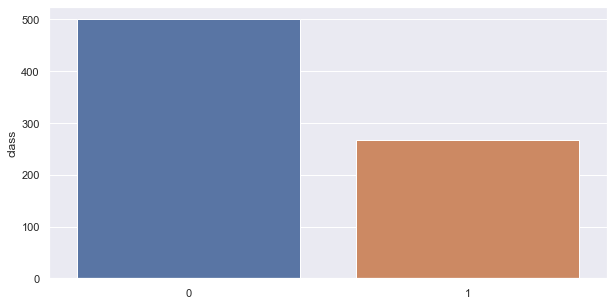

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=diabeteData["class"].value_counts().index, y=diabeteData["class"].value_counts())

# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

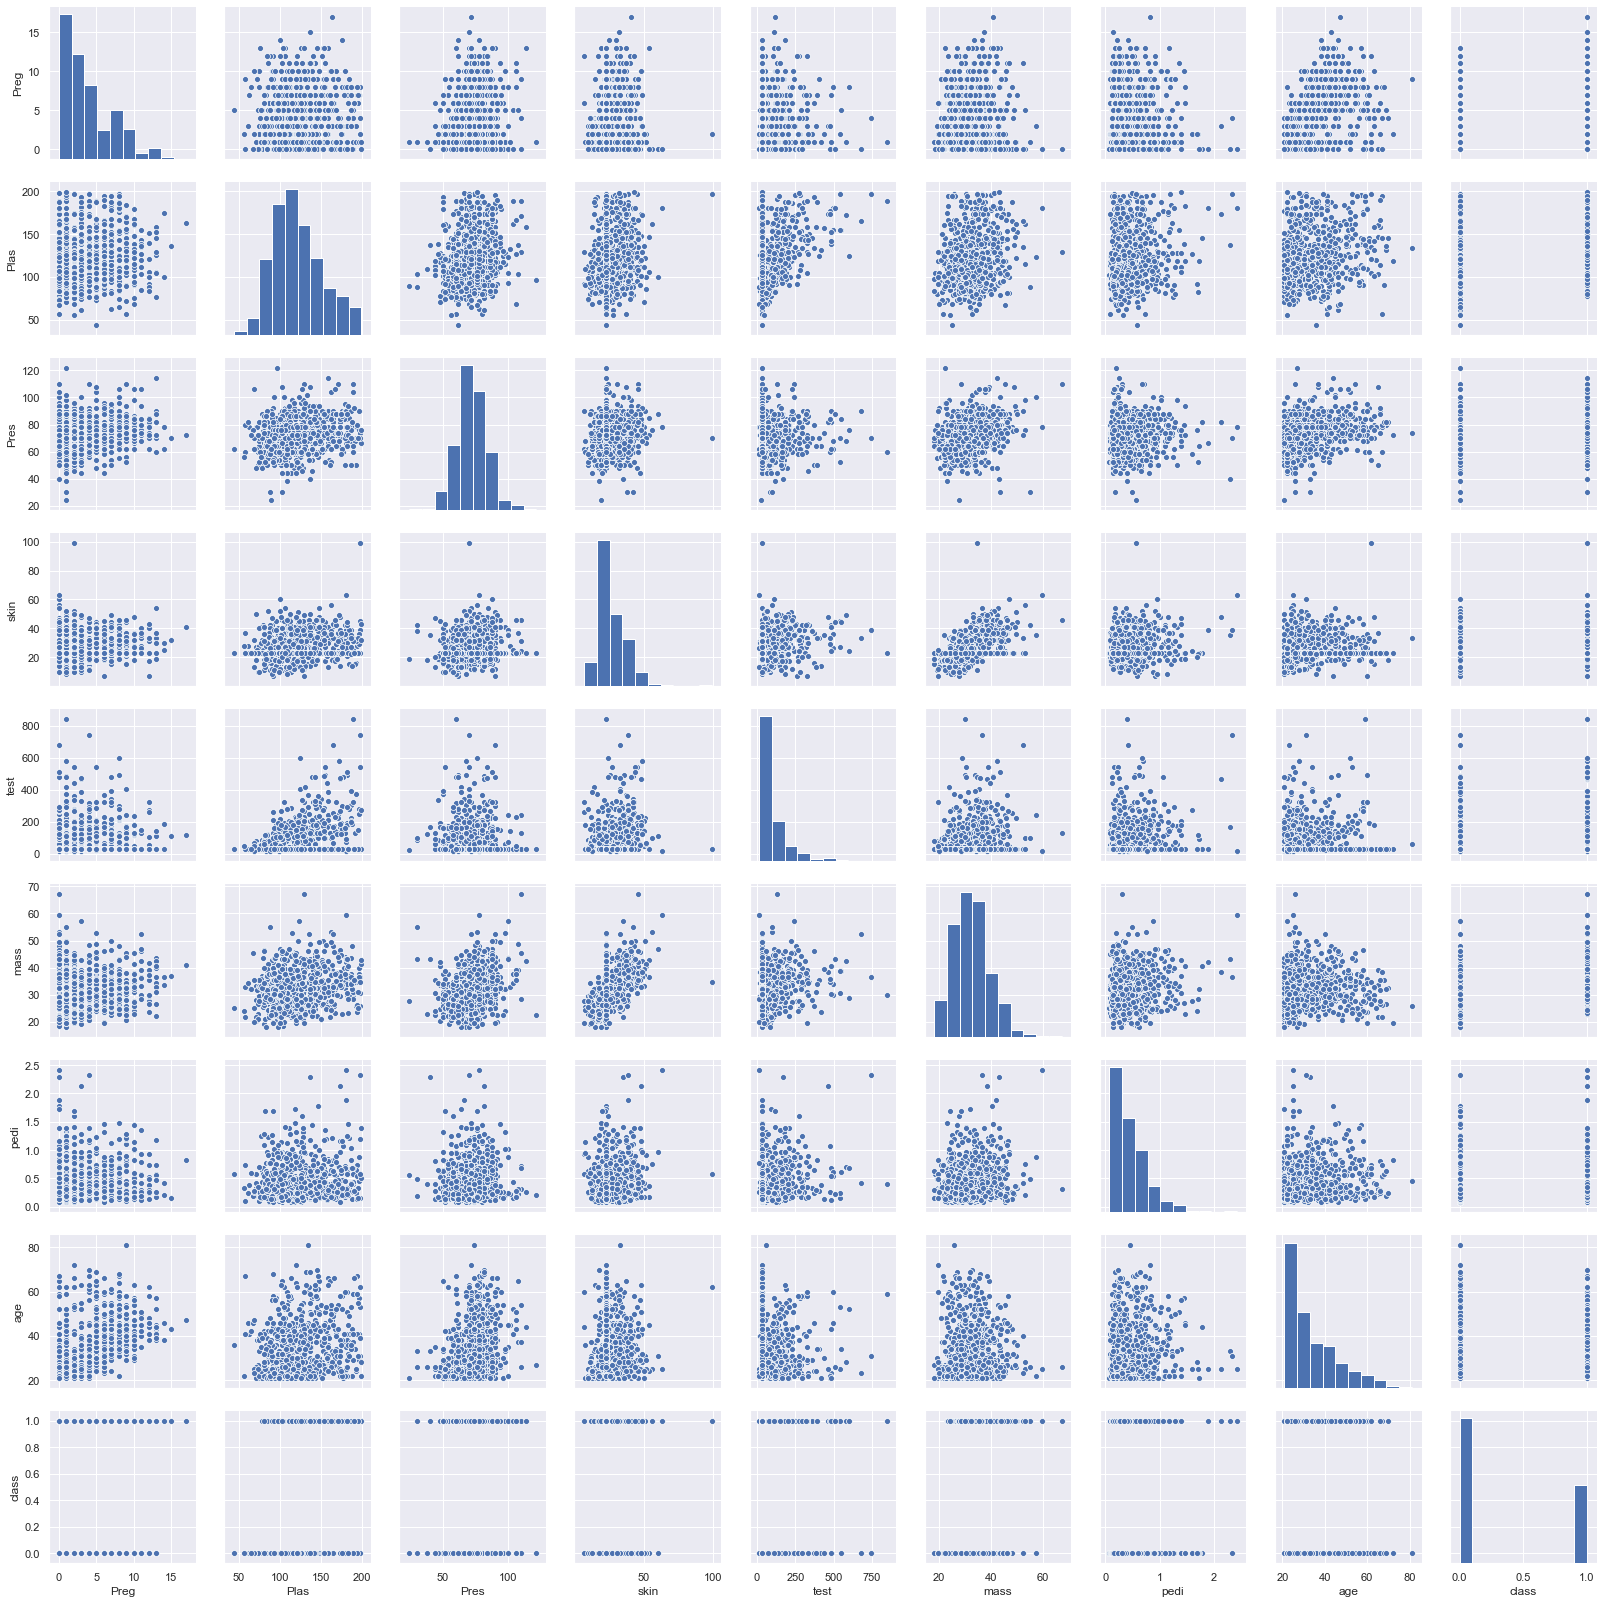

In [11]:
sns.pairplot(diabeteData)

In [12]:
diabeteData.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [13]:
diabeteData.corr().mask(abs(diabeteData.corr()) <= 0.8, np.nan)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plas,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pres,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
skin,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
test,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
mass,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
pedi,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Check for correlation between variables whose values are >0.8

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [14]:
X = diabeteData.drop("class" , axis=1)
y = diabeteData.pop("class")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [16]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

# 10. Print the accuracy of the model & print the confusion matrix

In [17]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.7272727272727273


In [18]:
y_predict_dt = dTree.predict(X_test)
metrics.confusion_matrix(y_test, y_predict_dt, labels=[0, 1])

array([[112,  34],
       [ 29,  56]], dtype=int64)

In [19]:
print(metrics.classification_report(y_test, y_predict_dt))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       146
           1       0.62      0.66      0.64        85

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



# 11. Apply the Random forest model and print the accuracy of Random forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=50,random_state=1,max_features=7,class_weight={0:.5,1:.5},max_depth=5,min_samples_leaf=14)
rfcl = rfcl.fit(X_train, y_train)

In [21]:
y_predict_rf = rfcl.predict(X_test)
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

0.8119180633147114
0.8095238095238095


In [22]:
metrics.confusion_matrix(y_test, y_predict_rf,labels=[0, 1])

array([[133,  13],
       [ 31,  54]], dtype=int64)

In [23]:
print(metrics.classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       146
           1       0.81      0.64      0.71        85

    accuracy                           0.81       231
   macro avg       0.81      0.77      0.78       231
weighted avg       0.81      0.81      0.80       231



# 12. Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [24]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=20, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [25]:
y_predict_ab = abcl.predict(X_test)
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

0.8119180633147114
0.8095238095238095


In [26]:
metrics.confusion_matrix(y_test, y_predict_ab,labels=[0, 1])

array([[126,  20],
       [ 32,  53]], dtype=int64)

In [27]:
print(metrics.classification_report(y_test, y_predict_ab))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       146
           1       0.73      0.62      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



# 13. Apply Bagging Classifier Algorithm and print the accuracy.

In [28]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dTree,n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [29]:
y_predict_bg = bgcl.predict(X_test)
print(bgcl.score(X_train, y_train))
print(bgcl.score(X_test, y_test))

0.9981378026070763
0.7748917748917749


In [30]:
metrics.confusion_matrix(y_test, y_predict_bg,labels=[0, 1])

array([[128,  18],
       [ 34,  51]], dtype=int64)

In [31]:
print(metrics.classification_report(y_test, y_predict_bg))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.74      0.60      0.66        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



# 14. Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50,random_state=1,learning_rate=0.1)
gbcl = gbcl.fit(X_train, y_train)

In [33]:
y_predict_gb = gbcl.predict(X_test)
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))

0.8733705772811918
0.8051948051948052


In [34]:
metrics.confusion_matrix(y_test, y_predict_gb,labels=[0, 1])

array([[129,  17],
       [ 28,  57]], dtype=int64)

In [35]:
print(metrics.classification_report(y_test, y_predict_gb))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       146
           1       0.77      0.67      0.72        85

    accuracy                           0.81       231
   macro avg       0.80      0.78      0.78       231
weighted avg       0.80      0.81      0.80       231



# 15. Apply Logistic Regression model for the same data and print the accuracy

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model_libnear = LogisticRegression(solver="liblinear", max_iter=1000)
model_libnear.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_predict_libnear = model_libnear.predict(X_test)
print(model_libnear.score(X_train, y_train))
print(model_libnear.score(X_test, y_test))

0.7690875232774674
0.7748917748917749


In [39]:
metrics.confusion_matrix(y_test, y_predict_libnear,labels=[0, 1])

array([[131,  15],
       [ 37,  48]], dtype=int64)

In [40]:
print(metrics.classification_report(y_test, y_predict_libnear))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.56      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [41]:
import inspect
from sklearn.utils.testing import all_estimators;print(metrics.classification_report(y_test, y_predict_libnear))

bestAcc = 0
bestBaseEstimator = None
excludedClassifiers = ['AdaBoostClassifier','ClassifierChain','MultiOutputClassifier', 
                       'OneVsOneClassifier','OneVsRestClassifier','OutputCodeClassifier',
                       'VotingClassifier']
for name, clf in all_estimators(type_filter='classifier'):
    if (name not in excludedClassifiers) and ('sample_weight' in inspect.getargspec(clf().fit)[0]):
        tempCl = AdaBoostClassifier(base_estimator=clf(), n_estimators=10, random_state=1, algorithm='SAMME')
        tempCl = tempCl.fit(X_train, y_train)
        tempScore = tempCl.score(X_test, y_test)
        if (tempScore > bestAcc):
            bestAcc = tempCl.score(X_test, y_test)
            bestBaseEstimator = clf
print(bestAcc)
print(bestBaseEstimator)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.56      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarnin

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarni

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: 

0.7748917748917749
<class 'sklearn.ensemble.bagging.BaggingClassifier'>


In [42]:
tempCl = AdaBoostClassifier(base_estimator=BaggingClassifier(), n_estimators=10, random_state=1, algorithm='SAMME')
tempCl = tempCl.fit(X_train, y_train)

In [43]:
y_predict_tempCl = tempCl.predict(X_test)
print(tempCl.score(X_train, y_train))
print(tempCl.score(X_test, y_test))

1.0
0.7748917748917749


In [44]:
metrics.confusion_matrix(y_test, y_predict_tempCl, labels=[0, 1])

array([[133,  13],
       [ 39,  46]], dtype=int64)

In [45]:
print(metrics.classification_report(y_test, y_predict_tempCl))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       146
           1       0.78      0.54      0.64        85

    accuracy                           0.77       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.77      0.76       231



In [46]:
tempCl = AdaBoostClassifier(base_estimator=model_libnear, n_estimators=10, random_state=1)
tempCl = tempCl.fit(X_train, y_train)

In [47]:
y_predict_tempCl = tempCl.predict(X_test)
print(tempCl.score(X_train, y_train))
print(tempCl.score(X_test, y_test))

0.6908752327746741
0.7272727272727273


In [48]:
metrics.confusion_matrix(y_test, y_predict_tempCl, labels=[0, 1])

array([[131,  15],
       [ 48,  37]], dtype=int64)